# SW02
## Aufgabe 2.1
In einer Klasse wurden in einer Statistik-Prüfung folgende Noten geschrieben:  
4.2, 2.3, 5.6, 4.5, 4.8, 3.9, 5.9, 2.4, 5.9, 6, 4, 3.7, 5, 5.2, 4.5, 3.6, 5, 6, 2.8, 3.3, 5.5, 4.2, 4.9, 5.1  
**a)** Ändern Sie drei Noten im Datensatz so ab, dass der Median gleich bleibt, aber der Mittelwert sich stark ändert.  
**b)** Erstellen Sie zu den beiden Datensätzen je ein Histogramm und einen Boxplot. Verwenden Sie plt.subplot(...).

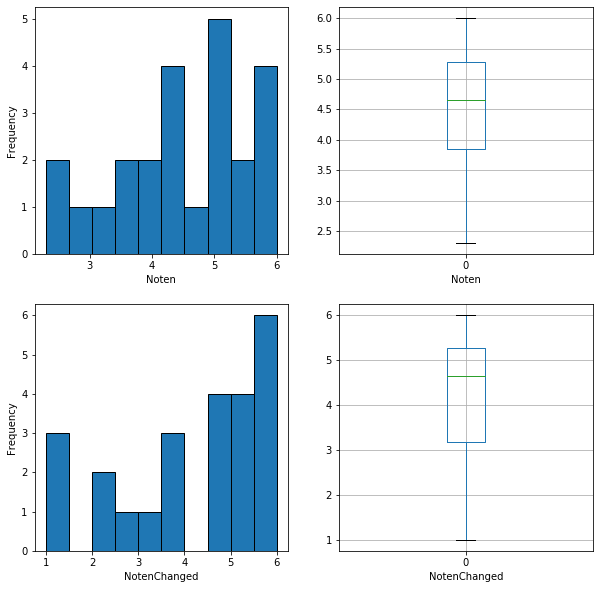

In [105]:
from pandas import Series,DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

noten = pd.DataFrame([4.2, 2.3, 5.6, 4.5, 4.8, 3.9, 5.9, 2.4, 5.9, 6, 4, 3.7, 5, 5.2, 4.5, 3.6, 5, 6, 2.8, 3.3, 5.5, 4.2, 4.9, 5.1])
notenChanged = pd.DataFrame([1.0, 2.3, 5.6, 4.5, 4.8, 3.9, 5.9, 2.4, 5.9, 6, 1.0, 3.7, 5, 5.2, 4.5, 3.6, 5, 6, 2.8, 3.3, 5.5, 1.0, 4.9, 5.1])

plt.subplot(221)
noten[0].plot(kind="hist", edgecolor="black", figsize=(10,10))
plt.xlabel("Noten")

plt.subplot(222)
noten.boxplot()
plt.xlabel("Noten")

plt.subplot(223)
notenChanged[0].plot(kind="hist", edgecolor="black")
plt.xlabel("NotenChanged")

plt.subplot(224)
notenChanged.boxplot()
plt.xlabel("NotenChanged")

plt.show()

## Aufgabe 2.2
21 Labors bestimmten den Kupfergehalt von 9 verschiedenen Klärschlammproben. Die Daten stehen in der auf Ilias abgelegten Datei klaerschlamm.dat zur Verfügung. Die erste Spalte bezeichnet das Labor, die restlichen 9 Spalten sind die verschiedenen
Klärschlammproben.  
  
Die Daten (in mg/kg) können mit dem Befehl  
_schlamm = pd.read_csv("*klaerschlamm.dat", sep=" ", index_col=0)_  
eingelesen werden (für * wieder der Dateipfad). Die erste Spalte Labor wollen wir noch entfernen, da sie uns nicht interessiert.  
  
**a)** Erstellen Sie für jede Probe einen Boxplot, und berechnen Sie jeweils das arithmetische Mittel und den Median. Bei welchen Proben gibt es Ausreisser, und wo unterscheiden sich arithmetischesMittel undMedianwesentlich? Beiwelchen der 9 Proben ist es plausibel, dass die wahre Konzentration unter 400 mg/kg liegt?

Mittelwert:
Pr2    511.428571
Pr7    465.523810
Pr8    449.952381
Pr3    443.428571
Pr6    394.857143
Pr4    389.238095
Pr9    388.904762
Pr1    246.142857
Pr5    188.238095
dtype: float64

Median:
Pr2    521.0
Pr7    481.0
Pr8    451.0
Pr3    446.0
Pr4    390.0
Pr6    385.0
Pr9    369.0
Pr1    244.0
Pr5    188.0
dtype: float64


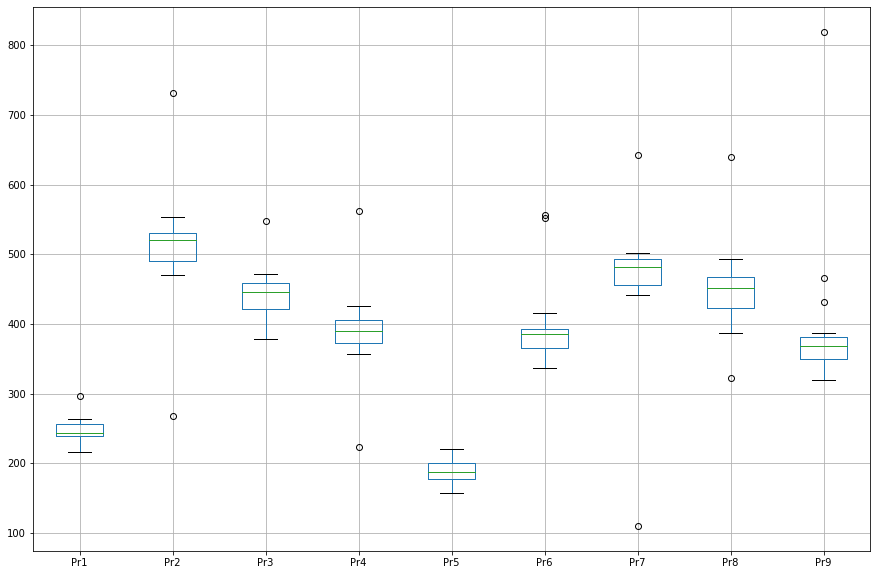

In [106]:
schlamm = pd.read_csv("klaerschlamm.dat", sep=" ", index_col=0)
schlamm = schlamm.drop("Labor",1)


print("Mittelwert:")
print(schlamm.mean().sort_values(ascending=False))
print("\nMedian:")
print(schlamm.median().sort_values(ascending=False))

schlamm.boxplot(figsize=(15,10))

**b)** Erstellen Sie für jedes Labor einen Boxplot der Messfehler. Unter dem Messfehler eines Labors bei einer Probe verstehen wir den gemessenen Wert minus den Median über alle Labors. Welche der 21 Labors haben systematische Fehler in ihrem Analyseverfahren? Welche haben grosse Zufallsfehler, und bei welchen Labors ist die Qualität der Analysen besonders gut?  
**Python-Hinweise:**  
Wir ziehen zunächst von jeder Spalte den Median ab...  
_schlamm_centered = schlamm - schlamm.median()_  
  
...und zeichnen den Boxplot mit vertauschten Zeilen und Spalten. Dies geschieht mit dem Attribut _.T_  
_schlamm_centered.T.plot(kind="box")_

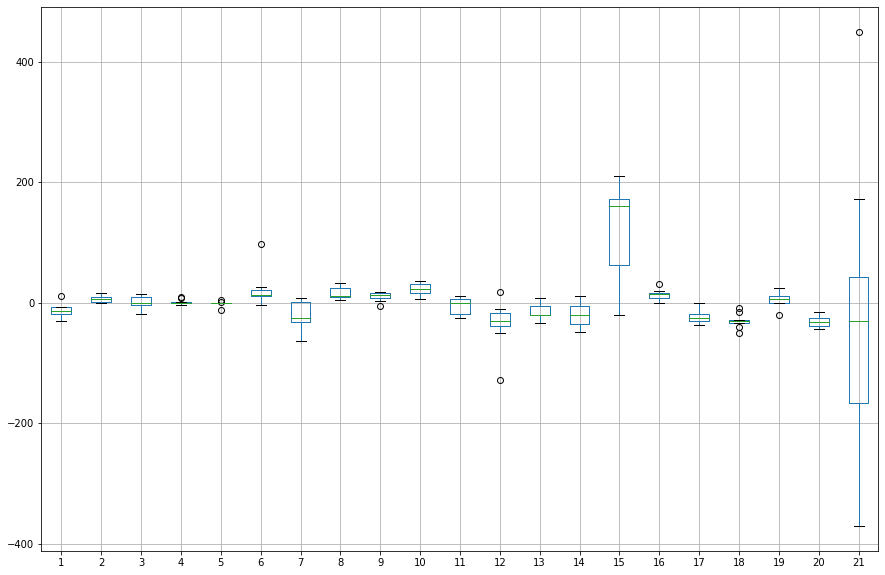

In [107]:
schlamm_centered = schlamm - schlamm.median()
schlamm_centered.T.boxplot(figsize=(15,10))

## Aufgabe 2.4
Edwin Hubble untersuchte seit 1920 am Mount Wilson Observatory die Eigenschaften von Galaxien ausserhalb der Milchstrasse. Mit Überraschung bemerkte er einen Zusammenhang zwischen der Distanz einer Galaxie zur Erde und dessen Geschwindigkeit, sich von der Erde fortzubewegen (Fluchtgeschwindigkeit). Hubbles ursprüngliche Daten von 24 galaktischen Nebeln ( E.Hubble, Proceedings of the National Academy of Science 15 (1929): 168-73) sind in Tabelle 1 gezeigt. Die Fluchtgeschwindigkeit ist in Kilometer pro Sekunde angegeben und konnte aufgrund der Rotverschiebung im Lichtspektrum der Galaxien mit grosser Genauigkeit bestimmt werden. Die Distanz einer Galaxie zur Erde wird in Megaparsec (Mpc) gemessen: ein Megaparsec entspricht etwa 3.09 × 1010m. Die Distanzen werden durch Vergleich der mittleren Luminosität von Galaxien mit der Luminosität von bestimmten bekannten Sternen bestimmt, wobei diese Methode relativ ungenau ist.  
  
**a)** Erstellen Sie von den Daten in Tabelle 1 ein Streudiagramm, in dem Sie die Distanz versus Fluchtgeschwindigkeit ufzeichnen. Lesen Sie dazu die Datei ein:

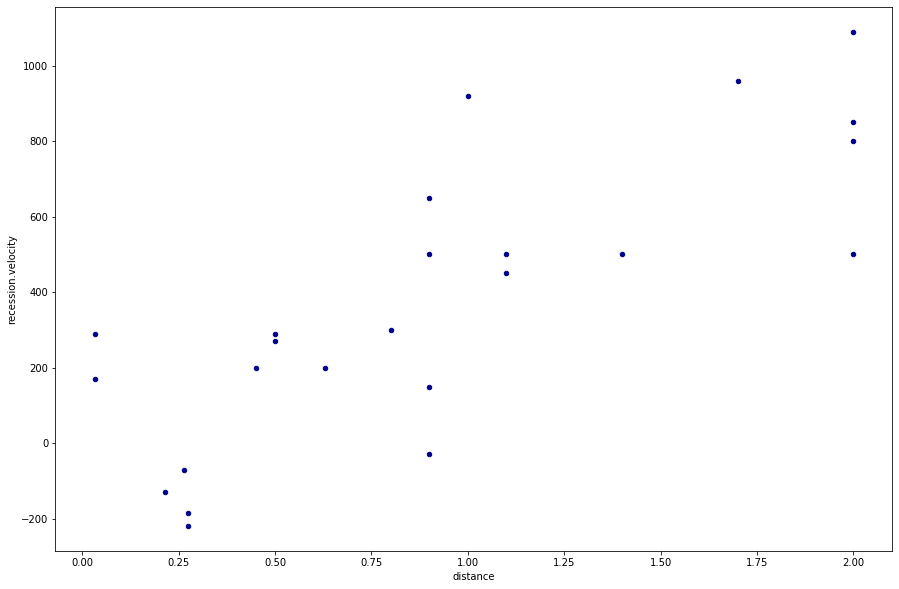

In [108]:
hubble = pd.read_csv("hubble.txt", sep=" ")
hubble.plot.scatter(x='distance',y='recession.velocity',c='DarkBlue', figsize=(15,10))

**b)** Bestimmen Sie mit dem Befehl np.polyfit(...) (siehe Skript) die Koeffizienten b0 und b1 für die Regressionsgerade  
y = b0 + b1x  
wobei y die Distanz und x die Fluchtgeschwindigkeit bezeichnet.

In [109]:
b, a = np.polyfit(hubble["recession.velocity"], hubble["distance"], deg=1)
print(a, b)

0.39909821584359284 0.0013729361049417948


**c)** Bestimmen Sie noch den Korrelationskoeffizienten und interpretieren Sie diesen.

In [110]:
hubble.corr()

,distance,recession.velocity
distance,1.000000,0.789639
recession.velocity,0.789639,1.000000


## Aufgabe 2.5
Wir betrachten eine Studie, die 1979 in den Vereinigten Staaten durchgeführt wurde (National Longitudinal Study of Youth, NLSY79): von 2584 Amerikanern imJahr 1981 wurde die Intelligenz (gemäss AFQT - armed forces qualifying test score) gemessen;
2006wurden dieselben Personen nach ihrem jährlichen Einkommen im Jahr 2005 und der Anzahl Jahre Schulbildung befragt. Uns interessiert hier natürlich, ob hohe Intelligenz oder eine lange Schulbildung zu einemhöheren Einkommen führen. In der auf
Ilias abgelegten Datei _income.dat_ finden Sie den Datensatz mit dem Einkommen, der Anzahl Jahre abgeschlossener Schulbildung und den ermittelten Intelligenzquotienten von 2584 Amerikanern.  
  
**a)** Lesen Sie den Datensatz income.dat ein und generieren Sie zwei Streudiagramme, in welchen das Einkommen versus Anzahl Jahre Schulbildung bzw. Einkommen versus AFQT aufgetragen sind.

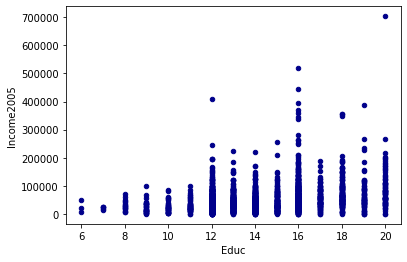

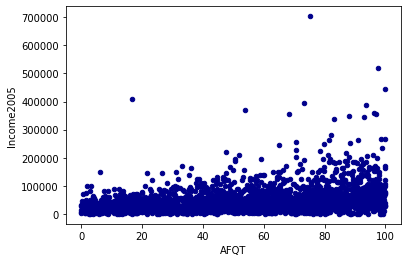

In [118]:
income = pd.read_csv("income.dat", sep=" ")

income.plot.scatter(x='Educ',y='Income2005',c='DarkBlue')
income.plot.scatter(x='AFQT',y='Income2005',c='DarkBlue')

**b)** Bestimmen Sie die Parameter a und b des linearen Modells y = a + bx, wobei y das Einkommen bezeichnet und x die Anzahl Jahre Schulbildung bzw. AFQT. Zeichnen Sie die Regressionsgerade wie im Skript.  
Wie interpretieren Sie jeweils die Parameter a und b?

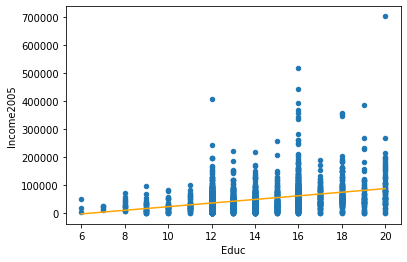

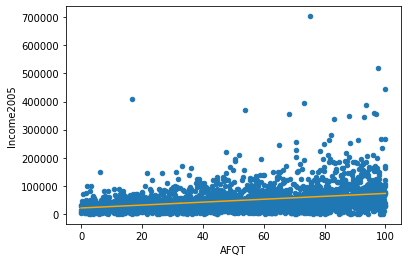

In [120]:
income.plot(kind="scatter", x="Educ", y="Income2005")
b, a = np.polyfit(income["Educ"], income["Income2005"], deg=1)
x = np.linspace(income["Educ"].min() ,income["Educ"].max())
plt.plot(x, a+b*x, c="orange")
plt.xlabel("Educ")
plt.ylabel("Income2005")
plt.show()

income.plot(kind="scatter", x="AFQT", y="Income2005")
b, a = np.polyfit(income["AFQT"], income["Income2005"], deg=1)
x = np.linspace(income["AFQT"].min() ,income["AFQT"].max())
plt.plot(x, a+b*x, c="orange")
plt.xlabel("AFQT")
plt.ylabel("Income2005")
plt.show()

**c)** Berechnen Sie die Korrelation zwischen Einkommen und Anzahl Jahre Schulbildung bzw. AFQT. Wie angebracht ist jeweils das Regressionsmodell?

In [123]:
income.corr()

,AFQT,Educ,Income2005
AFQT,1.000000,0.595160,0.308153
Educ,0.595160,1.000000,0.345647
Income2005,0.308153,0.345647,1.000000


## Aufgabe 2.6
In dieser Aufgabe betrachten wir 4 Datensätze, die von Anscombe konstruiert wurden.  
In jedem der Datensätze gibt es eine Zielvariable y und eine erklärende Variable x.

In [124]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

**a)** Stellen Sie jeden der 4 Datensätze als Streudiagramm dar, zeichnen Sie die Regressionsgerade ein und kommentieren Sie die Ergebnisse. Verwenden Siewieder *plt.subplot(...)* und *plt.scatter(...)*.